#                             [Triangle] Regression Analysis Final
- Triangle
- Trinity

![Triangle](http://www.se16.info/hgb/3triangles.gif)

## Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf

## Intro

### "목적의 명확화를 통한 목표 설정"

- 이 프로젝트를 통해 얻을 수 있는 것이 무엇이며, 어떤 부분에 중점을 가지고 팀 프로젝트를 진행할 것인가?

- 목적과 목표가 명확해야 과정에서 시행착오가 있어도 지치지 않는다.

- 시행착오를 반복하며 이 모델이 최종이 된 ‘이유’와 ‘근거’를 끊임없이 고민하는 ‘과정’ 에서 학습과 인사이트를 얻을 수 있을 것이라 판단

#### ▶ 시행착오의 과정 속에서의 배움과 인사이트에 주안점을 둚

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #1 데이터시트 달랑 2장 건네받고

![로뎅](http://www.hkn24.com/news/photo/201602/151931_137417_3942.jpg)

- 도대체 이 과제가 뭔가? 뭘 어떻게 하라는 것인가? 무에서 유를 창조해야 할 것만 같다.

- 회귀분석 배우지도 않았는데, 우리가 할 수 있을까?  

- 우선 매니저님들의 자료를 크롤..아니 참고해보자. 목차를 뽑아서 흐름을 파악해보자.

#### ▶ 과제가 도대체 무엇인가에 대한 분석 시도

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #2. 독립변수와 친해지기

- 영어사전과 구글링을 통해 생소한 독립변수들에 대한 개념 이해

- 직관적이지 않은 개념들은 '갓글 이미지 검색'을 통해 이해

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #3. 협업의 필요성

- 보다 효율적인 협업을 위해 '구글 독스' 를 활용

- 실시간으로 각자 알아낸 정보들 (변수의 의미, 상관도, 채택/배제 여부 등)을 올리며 비교/분석할 수 있어서 매우 유용했음. 

- 프로젝트 기간 내내 안식처 같은 역할

![docs](http://cfile209.uf.daum.net/original/2233523F59547EA3335A77)

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #4. 상관관계 분석 및 히트맵 그려보기

- 매니저님의 heatmap과 상관도 분석을 보고 아직 배우지 않은 상관관계에 대한 분석을 시도
- 분석 결과를 구글독스 스프레드시트에 정리


- 모든 변수들을 자료의 특성(양적, 질적 여부) 가리지 않고 상관분석으로 때려박음
- 모든 변수들에 대한 상관계수를 산출하여 히트맵과 스카터플롯 만듦

#### Importing Raw-Data

In [2]:
h = pd.read_csv('train.csv')
h.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0


#### 직관으로 채택한 변수들 (종속변수 'Price' 포함 15개)

In [12]:
price = h[["Price", "Age_08_04",  "KM", "HP", "Fuel_Type", "Color", "Guarantee_Period", "ABS", "Airbag_1", "Airbag_2", "Airco", "Automatic_airco", "Mistlamps", "Mfr_Guarantee", "Automatic"]]
price.head()

,Price,Age_08_04,KM,HP,Fuel_Type,Color,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Mistlamps,Mfr_Guarantee,Automatic
0,13500,23,46986,90,Diesel,Blue,3,1,1,1,0,0,0,0,0
1,13750,23,72937,90,Diesel,Silver,3,1,1,1,1,0,0,0,0
2,13750,30,38500,90,Diesel,Black,3,1,1,1,1,0,1,1,0
3,20950,25,31461,192,Petrol,Silver,12,1,1,1,1,1,0,1,0
4,19600,25,32189,192,Petrol,Red,3,1,1,1,1,1,1,1,0


#### 직관으로 채택한 변수들의 상관관계도표

In [13]:
corrmat = price.corr()
corrmat

,Price,Age_08_04,KM,HP,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Mistlamps,Mfr_Guarantee,Automatic
Price,1.000000,-0.883900,-0.575962,0.314898,0.166141,0.304380,0.095595,0.244497,0.444310,0.595089,0.227719,0.165026,0.068063
Age_08_04,-0.883900,1.000000,0.516486,-0.164049,-0.166382,-0.412789,-0.109551,-0.329166,-0.423356,-0.452331,-0.140741,-0.137613,-0.001682
KM,-0.575962,0.516486,1.000000,-0.350617,-0.136274,-0.176812,-0.017536,-0.141369,-0.132567,-0.278753,-0.076192,-0.209362,-0.107495
HP,0.314898,-0.164049,-0.350617,1.000000,0.090731,0.061984,0.047041,0.023144,0.237106,0.231570,0.216489,0.135502,0.031521
Guarantee_Period,0.166141,-0.166382,-0.136274,0.090731,1.000000,-0.048239,-0.115030,-0.327581,0.031111,-0.031752,-0.132656,-0.110925,-0.046370
ABS,0.304380,-0.412789,-0.176812,0.061984,-0.048239,1.000000,0.281975,0.667585,0.236048,0.120804,0.169801,0.085436,-0.002017
Airbag_1,0.095595,-0.109551,-0.017536,0.047041,-0.115030,0.281975,1.000000,0.282205,0.087278,0.044698,0.092270,0.064103,-0.030471
Airbag_2,0.244497,-0.329166,-0.141369,0.023144,-0.327581,0.667585,0.282205,1.000000,0.210419,0.103265,0.239080,0.187308,0.022506
Airco,0.444310,-0.423356,-0.132567,0.237106,0.031111,0.236048,0.087278,0.210419,1.000000,0.250119,0.472931,0.050753,-0.002170
Automatic_airco,0.595089,-0.452331,-0.278753,0.231570,-0.031752,0.120804,0.044698,0.103265,0.250119,1.000000,0.330373,0.053938,0.098700


#### 채택된 변수들의 상관관계도 Heatmap

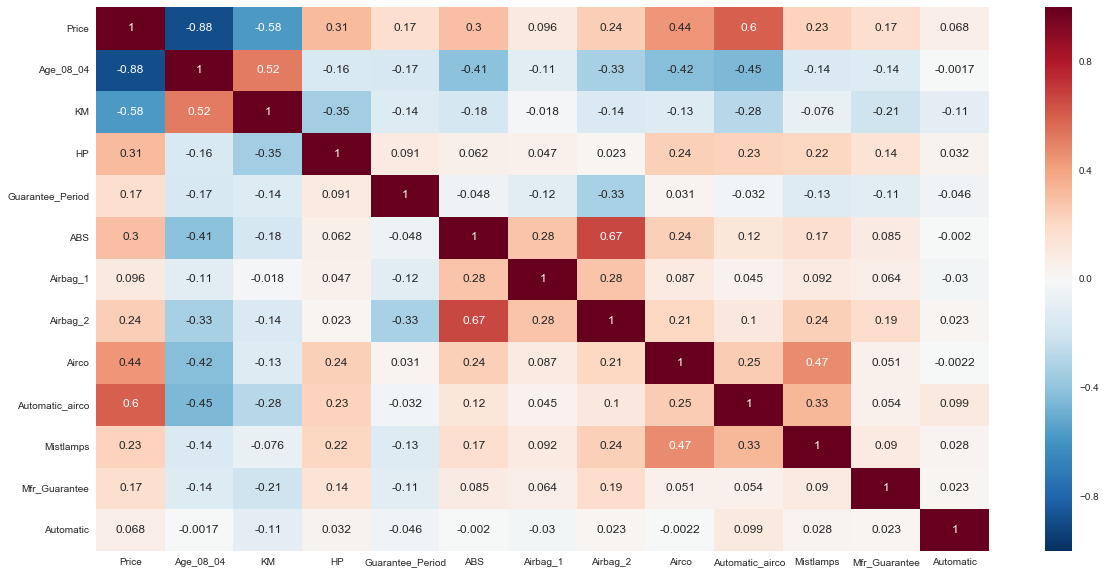

In [14]:
x, y = plt.subplots(figsize=(20, 10))  # figsize = 각 cell의 size를 결정
sns.heatmap(corrmat, annot=True)
plt.show()

#### 직관으로 기각한 변수 (종속변수 'Price' 포함 22개)

In [20]:
corrmatprice = h[["Price", "Mfg_Month", "Mfg_Year", "CC", "Doors", "Gears", "Quarterly_Tax", "Weight", "Boardcomputer", "CD_Player", "Central_Lock", "Powered_Windows", "Power_Steering", "Radio", "Sport_Model", "Backseat_Divider", "Metallic_Rim", "Radio_cassette", "Parking_Assistant", "Tow_Bar", "Met_Color", "BOVAG_Guarantee"]]
corrmatprice.head()

,Price,Mfg_Month,Mfg_Year,CC,Doors,Gears,Quarterly_Tax,Weight,Boardcomputer,CD_Player,...,Power_Steering,Radio,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Met_Color,BOVAG_Guarantee
0,13500,10,2002,2000,3,5,210,1165,1,0,...,1,0,0,1,0,0,0,0,1,1
1,13750,10,2002,2000,3,5,210,1165,1,1,...,1,0,0,1,0,0,0,0,1,1
2,13750,3,2002,2000,3,5,210,1170,1,0,...,1,0,0,1,0,0,0,0,0,1
3,20950,8,2002,1800,3,6,100,1185,0,1,...,1,0,0,0,1,0,0,0,0,1
4,19600,8,2002,1800,3,6,100,1185,1,0,...,1,0,1,1,1,0,0,0,0,1


In [21]:
corrmat2 = corrmatprice.corr()
corrmat2

,Price,Mfg_Month,Mfg_Year,CC,Doors,Gears,Quarterly_Tax,Weight,Boardcomputer,CD_Player,...,Power_Steering,Radio,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Met_Color,BOVAG_Guarantee
Price,1.000000,-0.044255,0.893302,0.144315,0.180798,0.053457,0.178874,0.557015,0.604629,0.493033,...,0.064949,-0.023749,0.166143,0.081085,0.136991,-0.024527,0.044791,-0.156850,0.152843,0.035516
Mfg_Month,-0.044255,1.000000,-0.079154,0.037848,-0.026678,-0.008836,-0.003706,-0.036109,0.007271,-0.038377,...,-0.032970,0.030851,0.030194,0.019131,0.026802,0.030851,-0.002427,-0.026882,0.015821,0.001220
Mfg_Year,0.893302,-0.079154,1.000000,0.109086,0.151531,-0.004086,0.173047,0.471215,0.711602,0.520990,...,0.077209,-0.006095,0.107876,0.090878,0.054862,-0.004280,0.048336,-0.164001,0.137465,-0.002678
CC,0.144315,0.037848,0.109086,1.000000,0.132715,0.038361,0.675267,0.619048,0.023319,0.036426,...,0.094364,0.016855,-0.034540,-0.018309,0.069519,0.016855,0.010153,0.046504,0.052218,0.000250
Doors,0.180798,-0.026678,0.151531,0.132715,1.000000,-0.174992,0.128078,0.312330,0.071303,0.092887,...,0.059692,0.001757,-0.100023,-0.026240,-0.038423,0.001757,0.016475,0.092843,0.091594,-0.002996
Gears,0.053457,-0.008836,-0.004086,0.038361,-0.174992,1.000000,-0.011840,0.021776,-0.042222,-0.064475,...,0.027694,0.031648,0.164950,0.036974,0.301766,0.031648,-0.009300,-0.027411,-0.005133,0.023741
Quarterly_Tax,0.178874,-0.003706,0.173047,0.675267,0.128078,-0.011840,1.000000,0.585494,0.101816,0.090297,...,0.046060,-0.028820,0.081636,0.212349,-0.001137,-0.028820,0.004976,0.012093,0.027395,0.083081
Weight,0.557015,-0.036109,0.471215,0.619048,0.312330,0.021776,0.585494,1.000000,0.258437,0.264947,...,0.042291,-0.043779,0.136108,0.038833,0.079740,-0.044052,0.038185,-0.077579,0.081974,-0.043857
Boardcomputer,0.604629,0.007271,0.711602,0.023319,0.071303,-0.042222,0.101816,0.258437,1.000000,0.522516,...,0.088005,-0.144105,0.064898,0.275180,0.007004,-0.144105,0.086363,-0.109477,0.099850,0.114324
CD_Player,0.493033,-0.038377,0.520990,0.036426,0.092887,-0.064475,0.090297,0.264947,0.522516,1.000000,...,0.072746,-0.173568,0.070374,0.149681,0.080620,-0.180277,0.057101,-0.064722,0.206230,0.081999


#### 기각된 변수들의 상관관계도 Heatmap

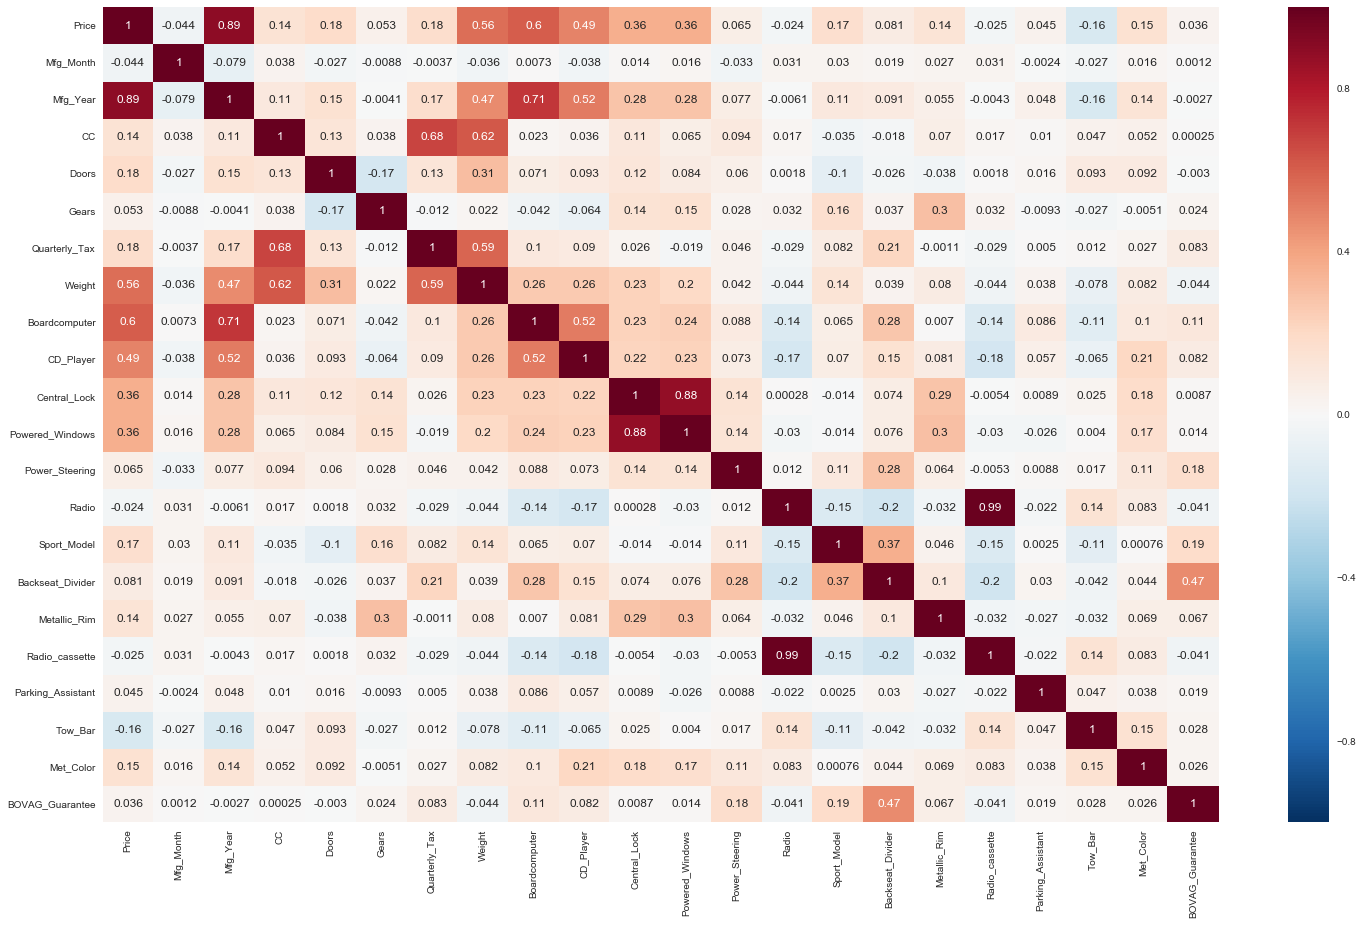

In [22]:
x, y = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat2, annot=True)
plt.show()

#### ▶ 각 변수들과 가격의 상관도 분석을 통해 어떤 변수가 가격결정에 영향력을 덜 발휘하는지를 대략적으로나마 가늠해볼 수 있었음
#### ▶ 추후 상관분석, 회귀분석(더미변수 개념)을 배울 때까지 이 '잘못된' 히트맵과 상관표가 그래도 변수 이해에 큰 백데이터로서 기능하였음

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #5. Model, Colour, Fuel_Type 데이터의 처리방안

- 수치화되지 않은 변수들을 어떻게 수치화 해야할지에 대한 논의. 맘같아선 버리고 싶은데 유의미할 것 같은 느낌적인 느낌.

#### #5-1. Model

- 기본 가정 : 티코보다 그렌저가 비싸듯, 모델과 가격간의 상관관계가 존재할 것
- 심화 가정 : 모델의 버전이 상향됨에 따라 최신모델이며 성능도 상향되므로 유의미한 양의 상관관계가 존재할 것

- 모델명 컬럼의 문자열을 속성별로 분석한 후 (Brand / Sub-brand / Version / … / Doors)
- 유의미한 결과를 이끌어낼 것이라 예상되는 두 가지 속성 (Version, Doors)을 가지고 가격 결정력을 분석

![toyota_model](http://cfile219.uf.daum.net/original/264B2D41595488E210FE3D)

#### ▶ Insight 1 : 버전 == CC/1000 이라는 규칙을 알아냄 (ex. ver1.3 = 1,300cc)
#### ▶ Insight 2 : Doors 는 독립변수 ‘Doors’ 에 종속적이므로 결과적으로 모델명은 변수에서 배제하기로 함

#### #5-2. Color

- 무채색 / 유채색으로 군집화
- 가설 : 무채색인 차량이 유채색인 차량보다 비싼 가격분포를 보일 것

In [28]:
data = pd.read_csv('train.csv')
data.head()
data_pp = data.copy()

#### 무채색 차 = 0, 유채색 차 = 1 로 Clustering

In [29]:
achromatic = np.array(['Silver', 'Black', 'Grey', 'White'])
color = np.array(['Blue', 'Red', 'Green', 'Yellow', 'Violet', 'Beige'])
data_pp["Color"][data_pp["Color"].isin(achromatic)] = 0 # 무채색 차 = '0' 로 군집화
data_pp["Color"][data_pp["Color"].isin(color)] = 1 # 유채색 차 = '1' 로 군집화
data_pp.Color.unique()

c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([1, 0], dtype=object)

In [43]:
data_pp["Color"].value_counts()

1    569
0    450
Name: Color, dtype: int64

#### ▶ n(1 ; 유채색 차량) = 569 , n(0 ; 무채색 차량) = 450

#### 가격과 색상의 Box Plot 및 Correlation Coefficient

(-0.15271964372082314, 9.6887601298488244e-07)

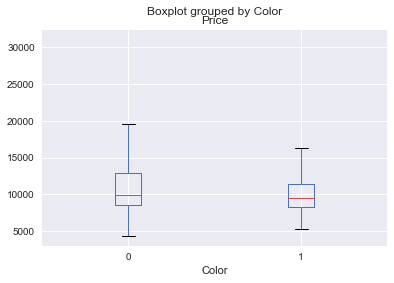

In [53]:
data_pp.boxplot(column="Price", by="Color")
stats.pearsonr(data_pp["Color"], data_pp["Price"])

#### ▶ 생각보다 유의미한 차이가 없었고, 상관계수도 낮아 변수로 채택하지 않기로 함

#### #5-3. Fuel_Type

- 가설 : 연료의 종류에 따라 가격에 차이가 존재할 것
- value_counts, describe, box_plot 등으로 분포 및 자료의 특성 파악

In [30]:
h["Fuel_Type"].value_counts()

Petrol    904
Diesel    106
CNG         9
Name: Fuel_Type, dtype: int64

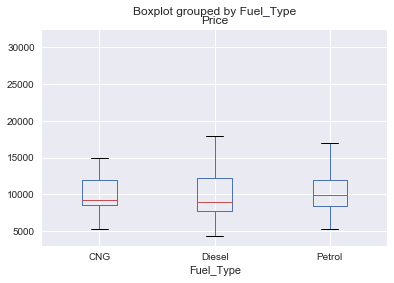

In [52]:
data_pp.boxplot(column="Price", by="Fuel_Type")

#### ▶  n= 904, 106, 9로 유의미한 결과값을 추출하기에는 데이터가  부족하다고 판단
    (설령 통계적 유의성이 검증된다 하여도 overfit에 대한 우려가 있어서 믿을 수가.. )

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #6. Selecting Variables

- backward 방식으로 유의성 검정 등 반복하며 변수 제거
- R을 통한 회귀분석을 배웠고, "R로 하세요" 라는 지시를 받들어 R로 작업해봄

- 변수선택 → 회귀분석 모델 시행 → 다중공선성 체크 반복하며 독립변수 제거해 나감.
- 유의수준 0.05를 웃도는 변수들이 없어져, 유의수준 0.01로 엄격하게 적용하여 최종 11개 독립변수 남을 때까지 변수선택 반복시행

#### 변수선택 및 유의수준에 따른 제거
![r1](http://cfile231.uf.daum.net/original/2308F13A5954A33534660E)

#### 변수들간 독립성 여부 체크 (VIF)
![r2](http://cfile210.uf.daum.net/original/2322E33A5954A336185451)

- 변수선택 → 회귀분석 모델 시행 → 다중공선성 체크 반복하며 독립변수 제거해 나감.
- 유의수준 0.05를 웃도는 변수들이 없어져, 유의수준 0.01로 엄격하게 적용하여 최종 11개 독립변수 남을 때까지 변수선택 반복시행

#### 회귀분석 검정 - 망했어요
![r3](http://cfile231.uf.daum.net/original/2741F43A5954A33630D6C5)

#### ▶ 비등비등하게 미세한 영향력을 가진 서로다른 질적 독립변수들이 통계적으로 소거되지 않아 '쥐어 짜내듯 억지로' 변수를 소거해 나가는 과정을 거치며, 일련의 작업의 결과가 결국 이 데이터에만 최적화된 'Overfitting' 을 야기할 것이라는 생각이 듦 (실제로 Ajd.R^2 = 0.9 정도)

#### ▶ 따라서 Raw-Data의 수많은 변수들을 합리적 방법으로 재구성(Clustering)하면 이 문제를 완화할 수 있지 않을까 생각하게 됨

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #7. 질적 변수 단일화

- T/F 값을 가진 질적 변수들을 취합하여 scoring 성격의 하나의 독립변수로 단일화하는 방안을 구상해봄
- 22개의 해당 변수들 중 가격 결정력이 낮아 기 소거된 변수들 (Tow_Bar, Mfr_Guarantee, BOVAG_Guarantee) 제외한 19개 변수들의 합으로 scoring된 새로운 'SUM_OPTION' 변수 컬럼 생성 (∴ min = 0, max = 19)

In [63]:
data.head(20)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
5,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,1,1,0,1,1,1,1,0,0,0
6,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
7,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,3,2002,34000,Petrol,192,1,...,1,1,0,1,0,1,1,0,0,0
8,18,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2...,17950,24,9,2002,21716,Petrol,110,1,...,1,1,1,0,0,0,0,1,0,1
9,20,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors,16950,30,3,2002,64359,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0


#### # 7-1. Sum_Option Column 생성 (Max(풀옵션) = 19, Min(껍데기차) = 0)

In [98]:
car_data_one['Sum_Option'] = car_data_one['InOut'] + car_data_one['Safe'] + car_data_one['ComFo']
car_data_one[['Price', 'Sum_Option']].head(10)

,Price,Sum_Option
0,13500,7
1,13750,8
2,13750,9
3,20950,9
4,19600,11
5,21500,12
6,22000,11
7,22750,12
8,17950,7
9,16950,9


#### ▶ 한계점 : 모든 질적변수들의 Score를 1로 책정함으로써 변수별 상이한 가격결정력이 반영되지 않음

#### #7-2. '연비' Column 생성

  - Weight / HP = Fuel Efficiency 라는 공식을 만들어 새로운 컬럼을 생성해보려 함

![effs](http://cfile213.uf.daum.net/original/2337744C5955C3C70E44A5)

#### ▶ P-Value =  0.386으로 생성하고자 한 '연비' Column이 통계적으로 유의하지 않다는 결론

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #8. 더 나은 군집화를 위한 고민

- 질적변수를 군집화할 보다 좋은 방법이 없을까 고민해보던 중, 중고차 사이트에서 5가지 카테고리별로 그루핑 해놓은 것을 발견

![cha](http://blogfiles.naver.net/20160203_92/kakaokamall_1454505249916Jpcrm_JPEG/%BF%C9%BC%C7%BB%E7%C7%D7.jpg)

- 군집별 독립변수들이 4개 이상 포함된 3개의 군집으로 나눈 후 (내/외장옵션, 편의장치, 안전장치))
- T = 1, F = 0 으로 scroing (min = 0, max = 4)
- scatter plot 및 상관관계 분석 후, 기존의 단일화(sum_option)의 관계와 비교

#### 분류
- 내외장 : Airco, Automatic_airco, Boardcomputer, Powered_windows, Backseat_Divider, Metallic_Rim, (6개)
- 편의장치 : CD_Player, Power_Steering, Radio, Mistlamps, Radio_cassette, (5개)
- 안전장치 : ABS, Airbag_2, Central_Lock, Parking_Assistant (4개)

In [73]:
car_data = pd.read_csv('train.csv')
car_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
5,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,1,1,0,1,1,1,1,0,0,0
6,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
7,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,3,2002,34000,Petrol,192,1,...,1,1,0,1,0,1,1,0,0,0
8,18,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2...,17950,24,9,2002,21716,Petrol,110,1,...,1,1,1,0,0,0,0,1,0,1
9,20,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors,16950,30,3,2002,64359,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0


In [82]:
car_data_one = car_data.drop(['Id', 'Model', 'Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color',
              'Color', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
                             'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'Airbag_1',
                             'Sport_Model', 'Tow_Bar'], axis = 1)

In [83]:
car_data_one = car_data_one.rename(columns = {'Age_08_04' : 'HowLong'})

#### '내외장' Group 군집화 (군집명 = 'Inout')

In [84]:
lst = ['Airco', 'Automatic_airco', 'Boardcomputer', 'Powered_Windows', 'Backseat_Divider', 'Metallic_Rim']
car_data_one['InOut'] = 0
for i in lst:
    car_data_one['InOut'] += car_data_one[i]
car_data_one.head()

,Price,HowLong,KM,HP,Weight,ABS,Airbag_2,Airco,Automatic_airco,Boardcomputer,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,InOut
0,13500,23,46986,90,1165,1,1,0,0,1,...,1,1,1,0,0,1,0,0,0,3
1,13750,23,72937,90,1165,1,1,1,0,1,...,1,0,1,0,0,1,0,0,0,3
2,13750,30,38500,90,1170,1,1,1,0,1,...,1,1,1,0,1,1,0,0,0,4
3,20950,25,31461,192,1185,1,1,1,1,0,...,1,1,1,0,0,0,1,0,0,4
4,19600,25,32189,192,1185,1,1,1,1,1,...,1,1,1,0,1,1,1,0,0,6


#### '편의장치' Group 군집화 (군집명 = 'ComFo')

In [85]:
lst2 = ['CD_Player', 'Power_Steering', 'Radio', 'Mistlamps', 'Radio_cassette']
car_data_one['ComFo'] = 0
for i in lst2:
    car_data_one['ComFo'] += car_data_one[i]
car_data_one['ComFo'].head()

0    1
1    2
2    2
3    2
4    2
Name: ComFo, dtype: int64

#### '안전장치' Group 군집화 (군집명 = 'Safe')

In [86]:
lst3 = ['ABS', 'Airbag_2', 'Central_Lock', 'Parking_Assistant']
car_data_one['Safe'] = 0
for i in lst3:
    car_data_one['Safe'] += car_data_one[i]
car_data_one['Safe'].head()

0    3
1    3
2    3
3    3
4    3
Name: Safe, dtype: int64

#### Sum_Option 과 3개의 군집 간 가격과의 상관관계 분석

In [102]:
car_data_one[['Price', 'Sum_Option', 'InOut', 'Safe', 'ComFo']].corr()

,Price,Sum_Option,InOut,Safe,ComFo
Price,1.000000,0.587972,0.602261,0.432458,0.339083
Sum_Option,0.587972,1.000000,0.920417,0.814231,0.668887
InOut,0.602261,0.920417,1.000000,0.674113,0.436719
Safe,0.432458,0.814231,0.674113,1.000000,0.312037
ComFo,0.339083,0.668887,0.436719,0.312037,1.000000


#### ▶ 내외장옵션의 가격과의 상관계수가 0.6으로 sum_option(0.58)보다 높게 나옴 → 선택의 문제에 직면

- 고민 포인트 : sum_option에 비해 상관계수는 높지만 in/out 카테고리 내에서도 가격결정력이 낮은 독립변수들이 포함되어 있는데, 가격결정력이 낮은 독립변수들 3개로 T값이 구성되어도 3점이고, 반대의 경우도 3점이라 이 부분에서 발생할 리스크는 어떻게 해야 할까?

#### ▶ 분포가 가격과의 양의 상관관계(0.6)를 이루고 있으며 통계적으로 유의하므로 채택, 단 상관관계가 부족한 옵션(ComPo)은 배제

In [103]:
car_data_two = car_data_one[['Price', 'HowLong', 'KM', 'InOut', 'Safe']]

#### 최종 변수 선택

In [104]:
car_data_two.head(1)

,Price,HowLong,KM,InOut,Safe
0,13500,23,46986,3,3


![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #9. Removing Outliers

- Outlier 제거 없이 Raw-Data 그대로 들이받았다는 점을 깨닫고, 
- 다시 시작하는 마음으로 독립변수를 군집화할 때 이상치 제거작업을 하기로 함
- 일반적으로 사분위수 기준으로 아웃라이어를 제거하지만 데이터의 양이 충분치 않아 max, min 기준으로 아웃라이어 제거 시행 

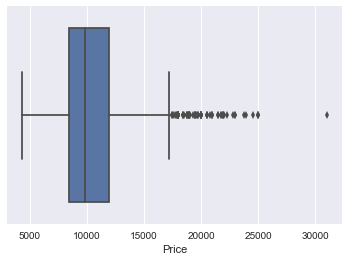

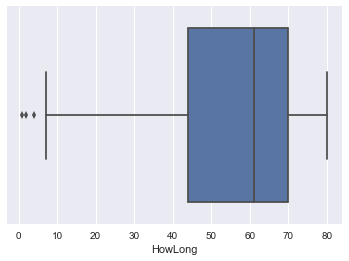

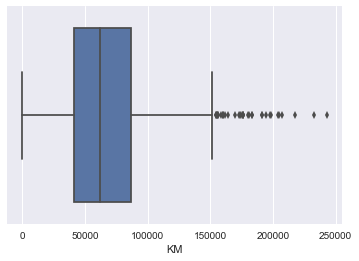

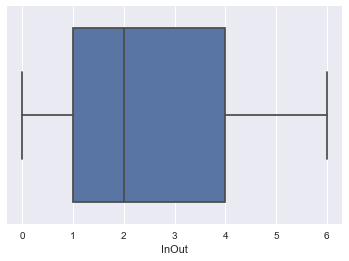

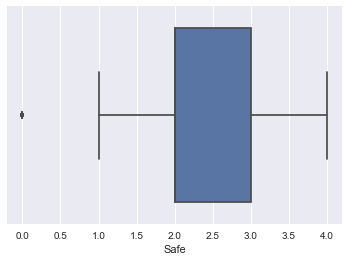

In [106]:
for i in car_data_two.columns:
    sns.boxplot(car_data_two[i])
    plt.show()

#### ▶ KM와 Age_08_04에서 수상한 이상치 발견

#### 'KM' 변수 이상치 분석

- 주행거리가 1km인 데이터 발견
- max 값보다 높은 데이터 다수 발견

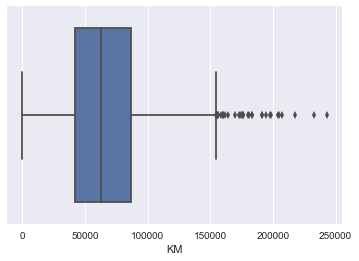

In [113]:
sns.boxplot(car_data_two['KM'])
plt.show()

In [115]:
car_data_two[car_data_two['KM'] == 1][['KM', 'HowLong', 'Price', 'InOut', 'Safe']]

,KM,HowLong,Price,InOut,Safe
133,1,1,17795,3,3


#### ▶ 동 KM에 해당하는 Price의 평균치로 치환

#### 'Age_08_04' 변수 이상치 분석

- 25% 밑으로 몇가지 아웃라이너가 보이나 HowLong 변수 특성상 무시해도 괜찮다고판단

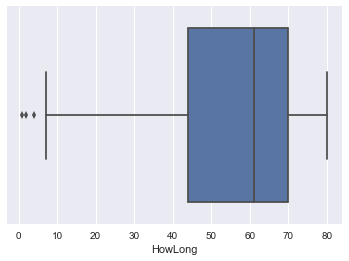

In [112]:
sns.boxplot(car_data_two['HowLong'])
plt.show()

#### 이상치 제거 후 산포도 확인

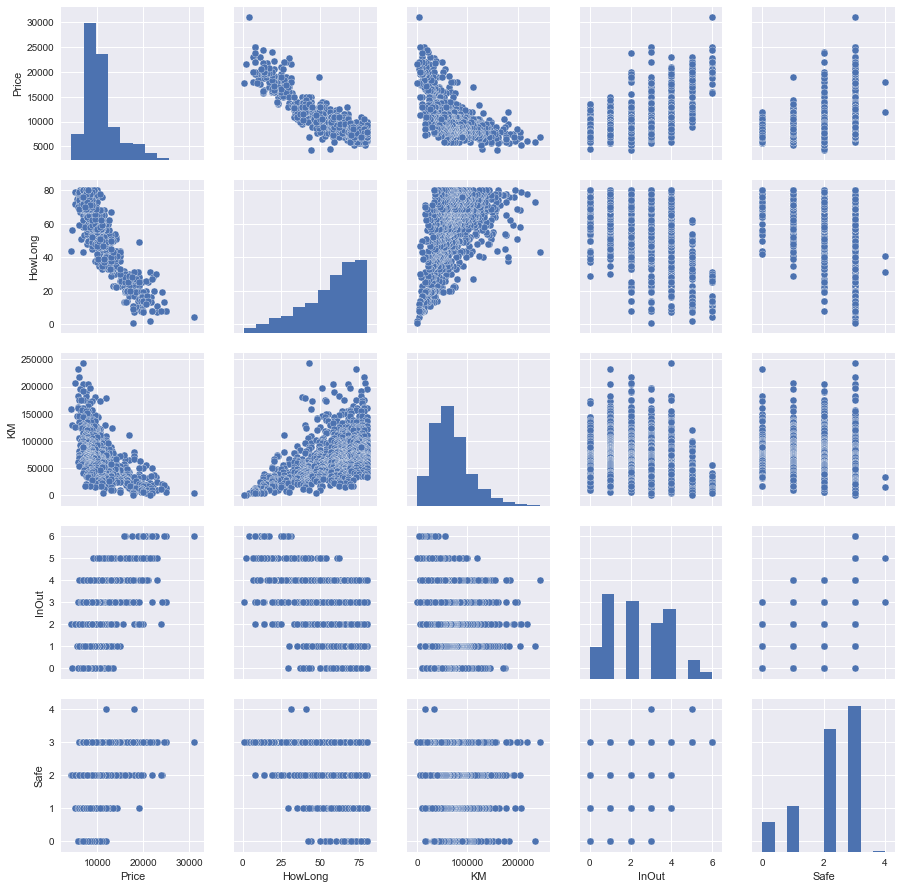

In [120]:
sns.pairplot(car_data_two)
plt.show()

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

![final](http://www.havilahlegal.com.au/wp-content/uploads/2014/09/final.jpg)
### Milestone #10. DATA SPLIT

#### #10-1. DATA SPLIT

- Train Data : 75% / Test Data : 25%

In [122]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data_two, test_size = 0.25)

#### #10-2. 독립변수, 종속변수 나누기

- 종속변수 : Y_test('Price')
- 독립변수 : X_test('HowLong, KM, InOut, Safe)

In [128]:
X_train = train_data.drop(['Price'], axis = 1)
Y_train = train_data['Price'].copy()

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #11. 다중 회귀분석 진행

#### #11-1. OLS

In [129]:
model = smf.ols("Price ~ HowLong + KM +  InOut + Safe ", train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     825.1
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          1.35e-274
Time:                        12:00:19   Log-Likelihood:                -6697.1
No. Observations:                 764   AIC:                         1.340e+04
Df Residuals:                     759   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.923e+04    318.990     60.285      0.000    1.86e+04    1.99e+04
HowLong     -138.5828      4.222    -32.824      0.000    -146.871    -130.295
KM            -0.0165      0.002     -9.653      0.000      -0.020      -0.013
InOut        546.7962     54.868      9.966      0.000     439.084     654.508
Safe        -396.8905     80.748     -4.915      0.000    -555.407    -238.374
==============================================================================
Omnibus:                      176.443   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.188
Skew:                           0.971   Prob(JB):                    3.23e-181
Kurtosis:                       7.726   Cond. No.                     4.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
attributes = ['HowLong', 'KM', 'InOut', 'Safe']

In [130]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_data[attributes], Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### #11.2 모델의 회귀계수 파악

In [131]:
model.coef_

array([ -1.38582756e+02,  -1.65113943e-02,   5.46796212e+02,
        -3.96890510e+02])

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

### Milestone #12. 최종 회귀모델 결정

## Price = 19,230 - 138.583(Age_08_04) - 0.0165(KM) + 546.796(InOut) - 396.891(Safe)

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

## Outro - 실패는 성공의 어머니

![mother](http://www.iuemag.com/may2015/ps/images/iu-e-magazine-mother-women-son-birth-man-happy-sun-god-image-optimistic-guru-accident-tears-unique-india.jpg)

![yellowa_arrow](http://mblogthumb1.phinf.naver.net/20150101_40/0311emily_1420103351695ER6Cr_JPEG/PicsArt_1419931865513.jpg?type=w2)

#### 한계점 및 보완점
- 코딩에 대한 협업 경험 부족 : 데이터명을 통일하지 않아 취합 과정에서 많은 오류 및 시간 낭비 발생
- 통계학적 접근과 고민 부족 : 정규성 검정, 다중공산성 등 통계학적인 의미를 찾는 시간이 부족함
- 전체적 시간 조절 실패 : 변수 선택 및 전처리에 많은 시간을 투자 
- 선형모델을 만든 후에 변수를 바꾸는 작업을 못함
- Black Box화 : 통계학 + 코딩에 대한 이해가 낮다보니 우리가 만들어낸 값에 대한 이해, 신뢰 부족

#### 우리는 모두 어머니입니다. - END -

![dm](http://vestovoy.ru/images/state15.jpg)

#                                       질문은 DM으로만 받습니다. :P